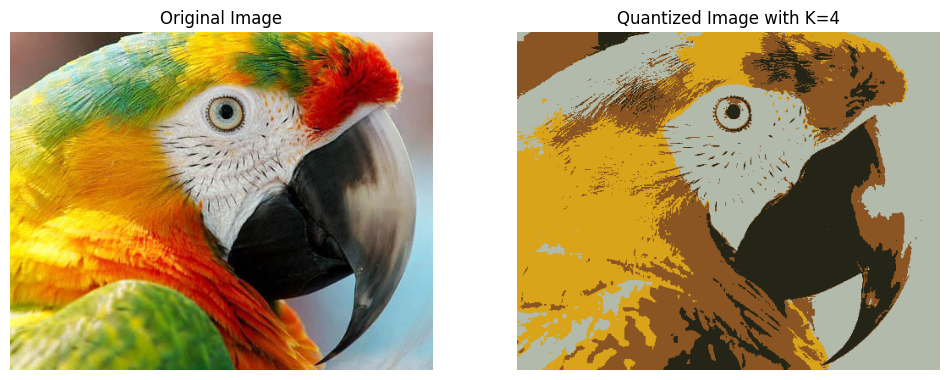

(4800000, 150096, 3.127)

In [7]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the image
image_path = 'parrot.jpg'
original_image = Image.open(image_path)
original_image = np.array(original_image)

# Reshape the image to a 2D array of pixels and 3 color values (RGB)
pixels = original_image.reshape(-1, 3)

# Apply K-Means clustering
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(pixels)

# Replace each pixel value with its closest centroid
quantized_pixels = np.array([kmeans.cluster_centers_[label] for label in kmeans.labels_])

# Reshape the quantized array into the original dimensions (400x500x3)
quantized_image = quantized_pixels.reshape(original_image.shape).astype(np.uint8)

# Display the original and the quantized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Quantized Image with K=4')
plt.imshow(quantized_image)
plt.axis('off')

plt.show()

# Compute the size of the original image in bits
original_size = original_image.size * 8  # each pixel RGB values are 8 bits each

# Compute the size of the compressed image in bits
# Each pixel now takes 2 bits, plus the size of the 4 centroids (4*3*8 bits)
compressed_size = quantized_image.size // 4 + k * 3 * 8

# Calculate the compression rate
compression_rate = (compressed_size / original_size) * 100

(original_size, compressed_size, compression_rate)
